In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv('Obesity Classification.csv')
data.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


<Axes: >

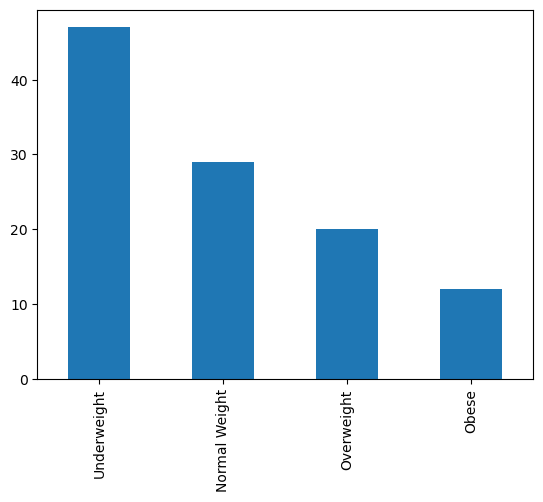

In [3]:
data['Label'].value_counts().plot(kind='bar')

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,108.0,56.046296,31.917939,1.0,28.75,56.5,83.25,110.0
Age,108.0,46.555556,24.720620,11.0,27.00,42.5,59.25,112.0
Height,108.0,166.574074,27.873615,120.0,140.00,175.0,190.00,210.0
Weight,108.0,59.490741,28.856233,10.0,35.00,55.0,85.00,120.0
BMI,108.0,20.549074,7.583818,3.9,16.70,21.2,26.10,37.2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


In [6]:
data.isnull().sum()

ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

# EDA

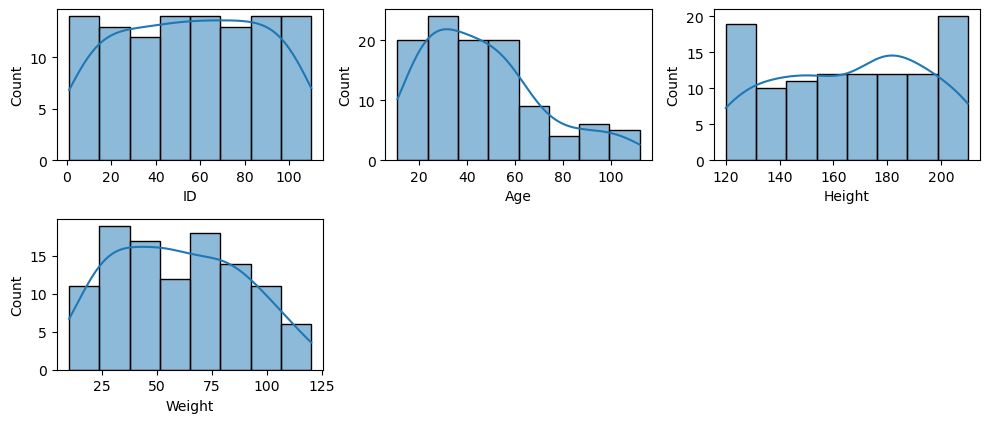

In [7]:
num_data = data.select_dtypes('int64')

plt.figure(figsize=(10,6))
plotnumber=1
for column in num_data:
    plt.subplot(3,3,plotnumber)
    sns.histplot(x=num_data[column],kde=True)
    plotnumber+=1
plt.tight_layout()

In [24]:
data['Gender'].value_counts()

Male      56
Female    52
Name: Gender, dtype: int64

### Feature Engineering

In [8]:
data.drop(columns=['ID'],inplace=True)

In [9]:
data.head()

,Age,Gender,Height,Weight,BMI,Label
0,25,Male,175,80,25.3,Normal Weight
1,30,Female,160,60,22.5,Normal Weight
2,35,Male,180,90,27.3,Overweight
3,40,Female,150,50,20.0,Underweight
4,45,Male,190,100,31.2,Obese


### Train test split

In [10]:
x=data.drop(columns=['Label'])
y=data['Label']

In [11]:
label_binarizer = LabelBinarizer()

In [12]:
y = label_binarizer.fit_transform(y)

In [13]:
label_binarizer.classes_

array(['Normal Weight', 'Obese', 'Overweight', 'Underweight'],
      dtype='<U13')

In [14]:
y= pd.DataFrame(y)

In [15]:
y.head()

,0,1,2,3
0,1,0,0,0
1,1,0,0,0
2,0,0,1,0
3,0,0,0,1
4,0,1,0,0


In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
x_train.head()

,Age,Gender,Height,Weight,BMI
64,46,Male,200,85,26.1
26,98,Male,200,110,34.2
22,78,Male,180,90,27.3
31,29,Male,180,85,26.1
47,62,Female,120,85,27.5


In [18]:
y_train.head()

,0,1,2,3
64,0,0,1,0
26,0,1,0,0
22,0,0,1,0
31,0,0,1,0
47,0,0,1,0


### Creating pipeline

In [23]:
trf1= ColumnTransformer([
    ('ohe_gender',OneHotEncoder(sparse_output=False,drop='first'),[1])
],remainder='passthrough')

In [27]:
trf2 = ColumnTransformer([
    ('scaler',StandardScaler(),[0,2,3,4])
],remainder='passthrough')